In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "random_walk"
    cd(joinpath(@__DIR__, "../../../"))
    Pkg.activate("Project.toml")
end

using MorphoMol
using MorphoMolNotebooks
using CairoMakie
using LinearAlgebra
using Random
using Rotations
using StaticArrays

  Activating project at `~/Doktor/Code/MorphoMol/MorphoMolNotebooks`
[ Info: Precompiling MorphoMol [85e20460-a9b2-48f6-9df6-e154e9748d83]
Precompiling MorphoMolNotebooks
  ✓ MorphoMolNotebooks
  1 dependency successfully precompiled in 58 seconds. 283 already precompiled.
[ Info: Precompiling MorphoMolNotebooks [3c5b58fc-d541-4bcd-a332-95372d8cdad8]
┌ Warning: Module MorphoMol with build ID fafbfcfd-9d8b-3e3b-0000-171ee8511ad6 is missing from the cache.
│ This may mean MorphoMol [85e20460-a9b2-48f6-9df6-e154e9748d83] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing MorphoMolNotebooks [3c5b58fc-d541-4bcd-a332-95372d8cdad8].
[ Info: Precompiling JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
[ Info: Precompiling Graphs [86223c79-3864-5bf0-83f7-82e725a168b6]
[ Info: Precompiling GLMakie [e9467ef8-e4e7-5192-8a1a-b1aee30e663a]


In [2]:
# v = direction of maximum energy
# w = template orientation
function rotating_needle_energy(x, v, w)
    v ⋅ (exp(Rotations.RotationVecGenerator(x...)) * w)
end

rotating_needle_energy (generic function with 1 method)

In [3]:
T = 0.25
β = 1.0 / T

σ = 0.5

v = [1.0, 0.0, 0.0] # direction of maximum energy
w = [1.0, 0.0, 0.0] # initial state

energy(x) = rotating_needle_energy(x, v, w), Dict{String, Any}()
perturbation(x) = x .+ randn(3) * σ

rwm = MorphoMol.Algorithms.RandomWalkMetropolis(energy, perturbation, β)
x = rand(3) .* pi
output = Dict{String, Vector}(
    "states" => Vector{Vector{Float64}}([]),
    "Es" => Vector{Float64}([]),
    "αs" => Vector{Float64}([]) #Acceptance rates
)
simulation_time_in_minutes = 0.25
MorphoMol.Algorithms.simulate!(rwm, x, simulation_time_in_minutes, output);

state_coordinates = [exp(Rotations.RotationVecGenerator(x...)) * w for x in output["states"]]
xs = [c[1] for c in state_coordinates]
ys = [c[2] for c in state_coordinates]
zs = [c[3] for c in state_coordinates];
output["αs"][end]

0.7242103476086733

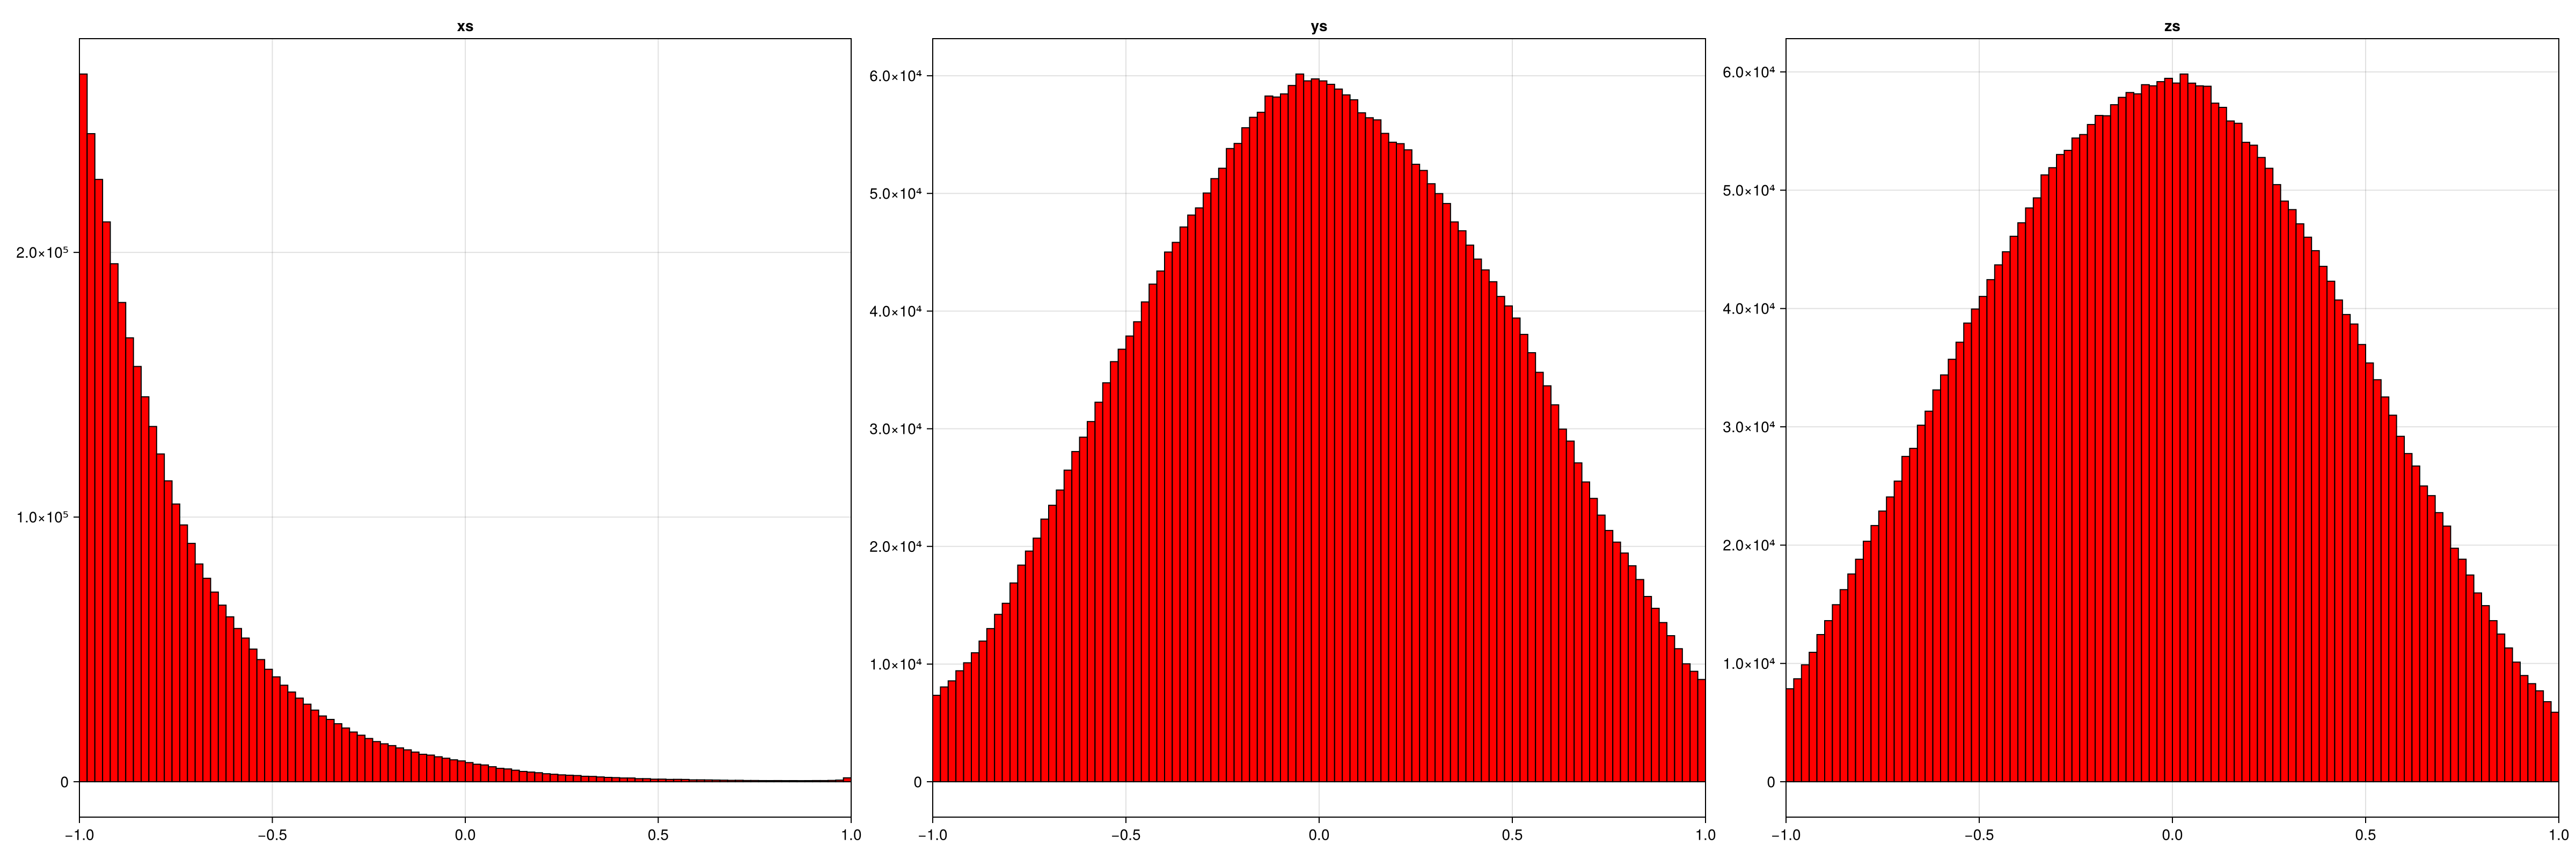

In [4]:
f = Figure(size = (2400, 800))
bin_number = 100
hist(f[1, 1], xs, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "xs", limits = ((-1.0, 1.0), nothing),))
hist(f[1, 2], ys, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "ys", limits = ((-1.0, 1.0), nothing),))
hist(f[1, 3], zs, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "zs", limits = ((-1.0, 1.0), nothing),))
f